### Task 03

### Data preprocesssing and feature engineering on Iris datasets 

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_classif

### Load IRIS dataset

In [105]:
## Load the  Iris dataset 
df=sns.load_dataset('iris')

In [106]:
## display first 05 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [107]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [108]:
## get data types, column names 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [109]:
df.describe() ## get the summary statistic (mean,min,max, std etc)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [110]:
## Check null values and their sum
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Check duplicates

In [111]:
### Check duplicated rows
df.duplicated().sum()

1

#### Drop Duplicates

In [112]:
## Drop duplicated values
df.drop_duplicates(inplace=True)

### Feature Engineering

In [113]:
## Check the data type of dataset
print(df.dtypes)    ### Only one catagorical column which need to be converted in proper formate for model input

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [114]:
df['species_encoded'] = df['species'].map({
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
})

In [117]:
print(df[['species', 'species_encoded']].head(10))

  species  species_encoded
0  setosa                0
1  setosa                0
2  setosa                0
3  setosa                0
4  setosa                0
5  setosa                0
6  setosa                0
7  setosa                0
8  setosa                0
9  setosa                0


### Normalize or scale features

#### Apply Standrad scaler

In [118]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [119]:
### select only numerical features
X=df.drop(['species','species_encoded'], axis=1)

In [120]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[149 rows x 4 columns]


In [122]:
Scaler_standard=StandardScaler()
X_standard=pd.DataFrame(Scaler_standard.fit_transform(X), columns=X.columns)

In [123]:
X_standard.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


#### Apply Minmax scaler

In [124]:
Scaler_minmax=MinMaxScaler()
X_minmax=pd.DataFrame(Scaler_minmax.fit_transform(X), columns=X.columns)

In [125]:
X_minmax.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


#### Add encoded target column back

In [126]:
X_standard['species_encoded']=df['species_encoded'] ### this is standardized data which is used for Ml models
X_minmax['species_encoded']=df['species_encoded'] ### This is scale data which is used for deep learning or when o to 1 range is needed 
## X_standard this is standardized data which is used for Ml models
## X_minmax  This is scale data which is used for deep learning or when o to 1 range is needed

### We use standardized data for further cleaning , outlier removing and feature engineering 

In [127]:
X_standard.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,-0.898033,1.012401,-1.333255,-1.308624,0.0
1,-1.139562,-0.137353,-1.333255,-1.308624,0.0
2,-1.381091,0.322549,-1.390014,-1.308624,0.0
3,-1.501855,0.092598,-1.276496,-1.308624,0.0
4,-1.018798,1.242352,-1.333255,-1.308624,0.0


In [128]:
X_standard.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,-0.898033,1.012401,-1.333255,-1.308624,0.0
1,-1.139562,-0.137353,-1.333255,-1.308624,0.0
2,-1.381091,0.322549,-1.390014,-1.308624,0.0
3,-1.501855,0.092598,-1.276496,-1.308624,0.0
4,-1.018798,1.242352,-1.333255,-1.308624,0.0


### Outliers Detection

#### Outiers detection by vissualization_based 

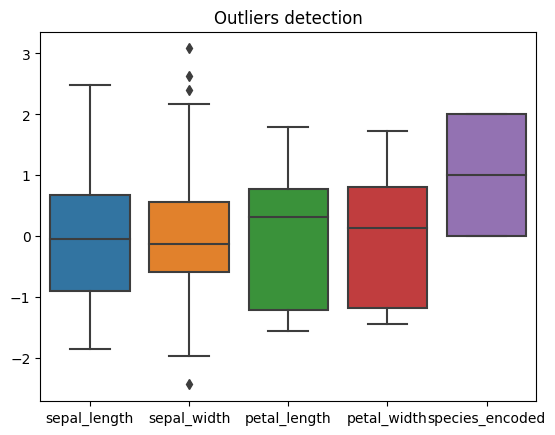

In [129]:
plt.Figure(figsize=(10,6))
sns.boxplot(data=X_standard)
plt.title('Outliers detection')
plt.show()

In [130]:
len(X_standard)

149

#### IQR to find the number of outliers in sepal_width

In [131]:
## Check numbers of outliers in sepal_width
Q1=X_standard['sepal_width'].quantile(0.25)
Q3=X_standard['sepal_width'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=X_standard[(X_standard['sepal_width']< lower_bound)| (X_standard['sepal_width']>upper_bound)]
print(' number of outliers in sepal width',len(outliers))

 number of outliers in sepal width 4


#### remove Outliers in sepal_width

In [132]:
## remove outliers from sepal_width
X_standard=X_standard[(X_standard['sepal_width']>=lower_bound)& (X_standard['sepal_width']<=upper_bound)]

In [133]:
len(X_standard)

145

#### Custom ratio or interaction 

In [134]:
## petal length to width ration
X_standard['petal_ratio']= X_standard['petal_length']/X_standard['petal_width']

In [135]:
## sepal length to width ration
X_standard['sepal_ratio']= X_standard['sepal_length']/X_standard['sepal_width']

In [136]:
## petal area
X_standard['petal_area']= X_standard['petal_length']/X_standard['petal_width']

In [137]:
## sepal area
X_standard['sepal_area']= X_standard['sepal_length']/X_standard['sepal_width']

In [138]:
X_standard.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded,petal_ratio,sepal_ratio,petal_area,sepal_area
0,-0.898033,1.012401,-1.333255,-1.308624,0.0,1.018822,-0.887033,1.018822,-0.887033
1,-1.139562,-0.137353,-1.333255,-1.308624,0.0,1.018822,8.296583,1.018822,8.296583
2,-1.381091,0.322549,-1.390014,-1.308624,0.0,1.062195,-4.281809,1.062195,-4.281809
3,-1.501855,0.092598,-1.276496,-1.308624,0.0,0.975450,-16.219151,0.975450,-16.219151
4,-1.018798,1.242352,-1.333255,-1.308624,0.0,1.018822,-0.820056,1.018822,-0.820056


### feature selection

#### Use correlation matrixx

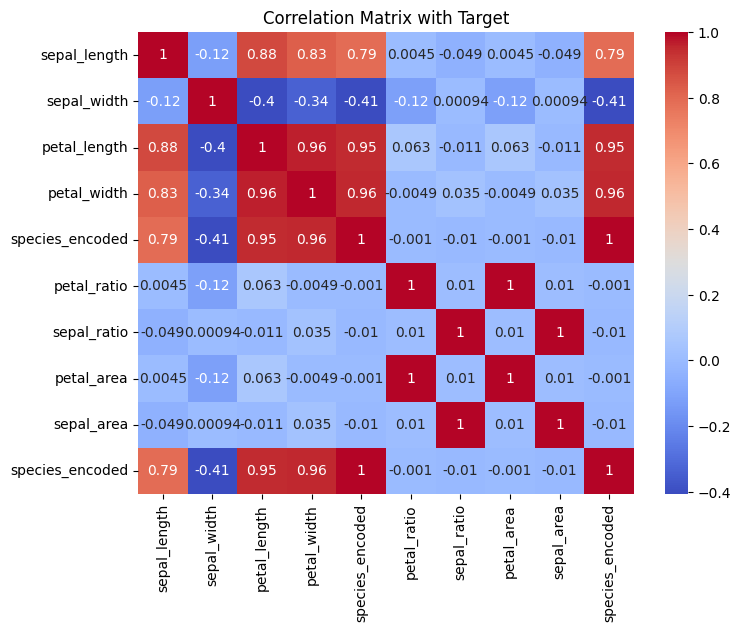

In [139]:
##If X_standard contain scaled data and specie encoded target column ha
df_corr = pd.concat([X_standard, df['species_encoded']], axis=1)

plt.figure(figsize=(8,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Target")
plt.show()

- petal length and petal widht are highly coorelted 
- petal length and specie encoded are highly encoded
- petal length and petal are highly coorelated with encoded sepecie
- species encoded and petal lentgh and petal width are highly coorelated
 